[View in Colaboratory](https://colab.research.google.com/github/Santosh-Gupta/Research2Vec/blob/master/Research2VecPublicPlayGroundVersion2.ipynb)

↓↓↓  Stuff you don't have to touch (unless you want to) just run it ↓↓↓ This will download the Tensorflow Model (2 GB) and necessary Python dictionaries into your Colab environment. 

In [0]:
#SECTION 1

import re
from collections import Counter
import time
%matplotlib inline
from __future__ import print_function
import collections
import math
import numpy as np
import pandas as pd
import os
import random
import tensorflow as tf
import zipfile
from matplotlib import pyplot
from six.moves import range
from six.moves.urllib.request import urlretrieve
from sklearn.manifold import TSNE
from urllib.request import urlretrieve
from os.path import isfile, isdir
import keras
import requests
import pickle
!pip install https://github.com/Phlya/adjustText/archive/master.zip
import importlib
import adjustText
importlib.reload(adjustText)
from adjustText import adjust_text

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
                
download_file_from_google_drive('15_inqIvXBnaC5mI_GPxLnV8Va8hxIqAM', 'model.zip') #using cbow 2 inputs

if not os.path.exists('MODEL'):
    os.makedirs('MODEL')

# UNZIP ZIP
print("Uncompressing zip file")
zip_ref = zipfile.ZipFile('model.zip', 'r')
zip_ref.extractall('MODEL/')
zip_ref.close()

print( os.getcwd() )
print( os.listdir('./MODEL') )

download_file_from_google_drive('1mdF0JfrzbOxeHD26JaUW8KEfIdMEHzQG', 'titleDict.pickle')

with open('titleDict.pickle', 'rb') as handle:
    titleDict = pickle.load(handle)
    
download_file_from_google_drive('12fiWctMsUJbmq0JaT3H8Zh23GdtxZThh', 'idDict.pickle')

with open('idDict.pickle', 'rb') as handle:
    idDict = pickle.load(handle)
    
download_file_from_google_drive('1xOF1qw6B0Sl63ROovlBDU4DbfaJbplxY', 'linkDict.pickle')

with open('linkDict.pickle', 'rb') as handle:
    linkDict = pickle.load(handle)
    
with tf.Session() as sess:
  saver = tf.train.import_meta_graph('./MODEL/Research2VecEmbedSize80.ckpt.meta')
  saver.restore(sess, './MODEL/Research2VecEmbedSize80.ckpt' )

  embeddings = tf.get_default_graph().get_tensor_by_name('embeddings:0') 
  softmax_weights = tf.get_default_graph().get_tensor_by_name('softmax_weights:0') 
  
  normSM = tf.sqrt(tf.reduce_sum(tf.square(softmax_weights), 1, keepdims=True))
  normalized_embeddingsSM = softmax_weights / normSM
  
  norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keepdims=True))
  normalized_embeddings = embeddings / norm
  
  final_embeddings = normalized_embeddings.eval()
  final_embeddingsSM = normalized_embeddingsSM.eval()
  



Using TensorFlow backend.


     - 3.3MB 89.7MB/s
  Running setup.py bdist_wheel for adjustText ... - done
  Stored in directory: /tmp/pip-ephem-wheel-cache-iyv3h9mm/wheels/7a/56/aa/ee86b18565ad149ba3a5470b55bbc5081701fd0b57141ed055
Successfully built adjustText
Uncompressing zip file
/content
['Research2VecEmbedSize80.ckpt.index', 'checkpoint', 'Research2VecEmbedSize80.ckpt.data-00000-of-00001', 'Research2VecEmbedSize80.ckpt.meta']
INFO:tensorflow:Restoring parameters from ./MODEL/Research2VecEmbedSize80.ckpt


↑↑↑ Stuff you don't have to touch (unless you want to) just run it ↑↑↑

Step 2:

Go to semanticscholar.com to find what papers you want to look up, either use title 
in section 2 to look up embedID, or linkID in section 3 to look up embedID

In [0]:
#Section 2

#Use https://www.semanticscholar.org to first find papers you want to analyze, then 'titlePhrase' to find the paper in this recommender.  

titlePhrase = 'Thought Vectors'  
lines = []
for i in titleDict:
  if type(titleDict[i]) is str:
    if str.lower(titlePhrase) in str.lower(titleDict[i]) :
        lines.append(i)
print("Number of results ", len(lines))
for j in lines:
  print("EMBED ID:", j, "| TITLE:", titleDict[j], "| LINK:",  linkDict[j] )
  

Number of results  2
EMBED ID: 459313 | TITLE: Skip-Thought Vectors | LINK: https://semanticscholar.org/paper/d3bbd57899d938e8c4bcafbbda10ceb59638e4db
EMBED ID: 1210743 | TITLE: Trimming and Improving Skip-thought Vectors | LINK: https://semanticscholar.org/paper/205555d523718cf8dc30e2ae4e979edf26e82241


In [0]:
#Section 3

idString = 'd3bbd57899d938e8c4bcafbbda10ceb59638e4db'  
lines = []
for i in idDict:
  if type(idDict[i]) is str:
    if idString in str.lower(idDict[i]) :
        lines.append(i)
for j in lines:
  print(idString)
  print("EMBED ID:", j, "| TITLE:", titleDict[j], "| LINK:",  linkDict[j] )

d3bbd57899d938e8c4bcafbbda10ceb59638e4db
EMBED ID: 459313 | TITLE: Skip-Thought Vectors | LINK: https://semanticscholar.org/paper/d3bbd57899d938e8c4bcafbbda10ceb59638e4db


Step 3

Input the embedID(s) into section 4. 

If you have less than or more than 4 papers, you can alter the code (lines 6-25). If you want more or less than 200 papers returned and analyzed, you can alter line 3.  

Run section 4 to get a list of similar papers, in order of most similar at the top

In [0]:
#Section 4

NumberOfPapers = 200  #Number of most similar papers to view and analyze in TSNE

#Set the embedID's of the paper(s) you want analyzed. 
paper1EmbedID = 459313       #TITLE: Skip-Thought Vectors | LINK: https://semanticscholar.org/paper/d3bbd57899d938e8c4bcafbbda10ceb59638e4db
paper2EmbedID = 1210743  # TITLE: Trimming and Improving Skip-thought Vectors | LINK: https://semanticscholar.org/paper/205555d523718cf8dc30e2ae4e979edf26e82241
paper3EmbedID = 244279  #TITLE: Distributed Representations of Sentences and Documents | LINK: https://semanticscholar.org/paper/1510cf4b8abea80b9f352325ca4c132887de21a0
paper4EmbedID = 1418824 # TITLE: Incremental sentence compression using LSTM recurrent networks | LINK: https://semanticscholar.org/paper/4720f79749d740e18bed4ade8d6b6b742c9dc112

# ↓↓↓ You can adjust this to use any number of combined papers ↓↓↓

paper1 = np.take(final_embeddings, paper1EmbedID , axis=0)   
paper2 = np.take(final_embeddings, paper2EmbedID , axis=0) 
paper3 = np.take(final_embeddings, paper3EmbedID , axis=0)   
paper4 = np.take(final_embeddings, paper4EmbedID , axis=0) 

paper1SM = np.take(final_embeddingsSM, paper1EmbedID , axis=0)   
paper2SM = np.take(final_embeddingsSM, paper2EmbedID , axis=0) 
paper3SM = np.take(final_embeddingsSM, paper3EmbedID , axis=0)   
paper4SM = np.take(final_embeddingsSM, paper4EmbedID , axis=0) 


extracted_v = paper1 + paper2 + paper3 + paper4  #Don't need to average since vectors are normalized 
extracted_vSM = paper1SM + paper2SM + paper3SM + paper4SM  #Don't need to average since vectors are normalized 

# ^^^ You can adjust this to use any number of combined papers ^^^

dotprods_v1 = np.matmul(extracted_v, np.transpose(final_embeddings))
dotprods_v2 = np.matmul(extracted_vSM, np.transpose(final_embeddings))
dotprods_v3 = np.matmul(extracted_v, np.transpose(final_embeddingsSM))
dotprods_v4 = np.matmul(extracted_vSM, np.transpose(final_embeddingsSM))

g1 =  (-dotprods_v1).argsort()
h1 = np.sort(dotprods_v1)[::-1]
stk1 = np.vstack((g1 , h1) )[: , 0:NumberOfPapers]

g2 =  (-dotprods_v2).argsort()
h2 = np.sort(dotprods_v2)[::-1]
stk2 = np.vstack((g2 , h2) )[: , 0:NumberOfPapers]

g3 =  (-dotprods_v3).argsort()
h3 = np.sort(dotprods_v3)[::-1]
stk3 = np.vstack((g3 , h3) )[: , 0:NumberOfPapers]

g4 =  (-dotprods_v4).argsort()
h4 = np.sort(dotprods_v4)[::-1]
stk4 = np.vstack((g4 , h4) )[: , 0:NumberOfPapers]

stkAll = np.concatenate((stk1, stk2, stk3, stk4), axis = 1)

i = np.argsort(  -stkAll[1]  )
stkAll2 = stkAll[:,i]

_, idx = np.unique(stkAll2[0], return_index=1)
stkAll3 = stkAll2[:, np.sort(idx)]

for k in range(0, NumberOfPapers):
  print("EMBED ID:", int(stkAll3[0][k]), "| TITLE:", titleDict[stkAll3[0][k]], "| LINK:",  linkDict[stkAll3[0][k]] )

EMBED ID: 1373358 | TITLE: Recent Trends in Deep Learning Based Natural Language Processing | LINK: https://semanticscholar.org/paper/14f0287f8603b7ce8cc28e60abfbc8f0650a04be
EMBED ID: 1210743 | TITLE: Trimming and Improving Skip-thought Vectors | LINK: https://semanticscholar.org/paper/205555d523718cf8dc30e2ae4e979edf26e82241
EMBED ID: 459313 | TITLE: Skip-Thought Vectors | LINK: https://semanticscholar.org/paper/d3bbd57899d938e8c4bcafbbda10ceb59638e4db
EMBED ID: 244279 | TITLE: Distributed Representations of Sentences and Documents | LINK: https://semanticscholar.org/paper/1510cf4b8abea80b9f352325ca4c132887de21a0
EMBED ID: 1367382 | TITLE: Learning Generic Sentence Representations Using Convolutional Neural Networks | LINK: https://semanticscholar.org/paper/26ca85f120521344a4710d1e755d4b698da24303
EMBED ID: 1439792 | TITLE: Towards Universal Paraphrastic Sentence Embeddings | LINK: https://semanticscholar.org/paper/06c62a87ac68b99f0e4049c40d5da3a4d68d1e5c
EMBED ID: 1170028 | TITLE: R

Step 4:

Run section 5 to get a TSNE map of the inputted and similar papers

Will take 12-15 minutes for 200 papers

-Time Lapse-

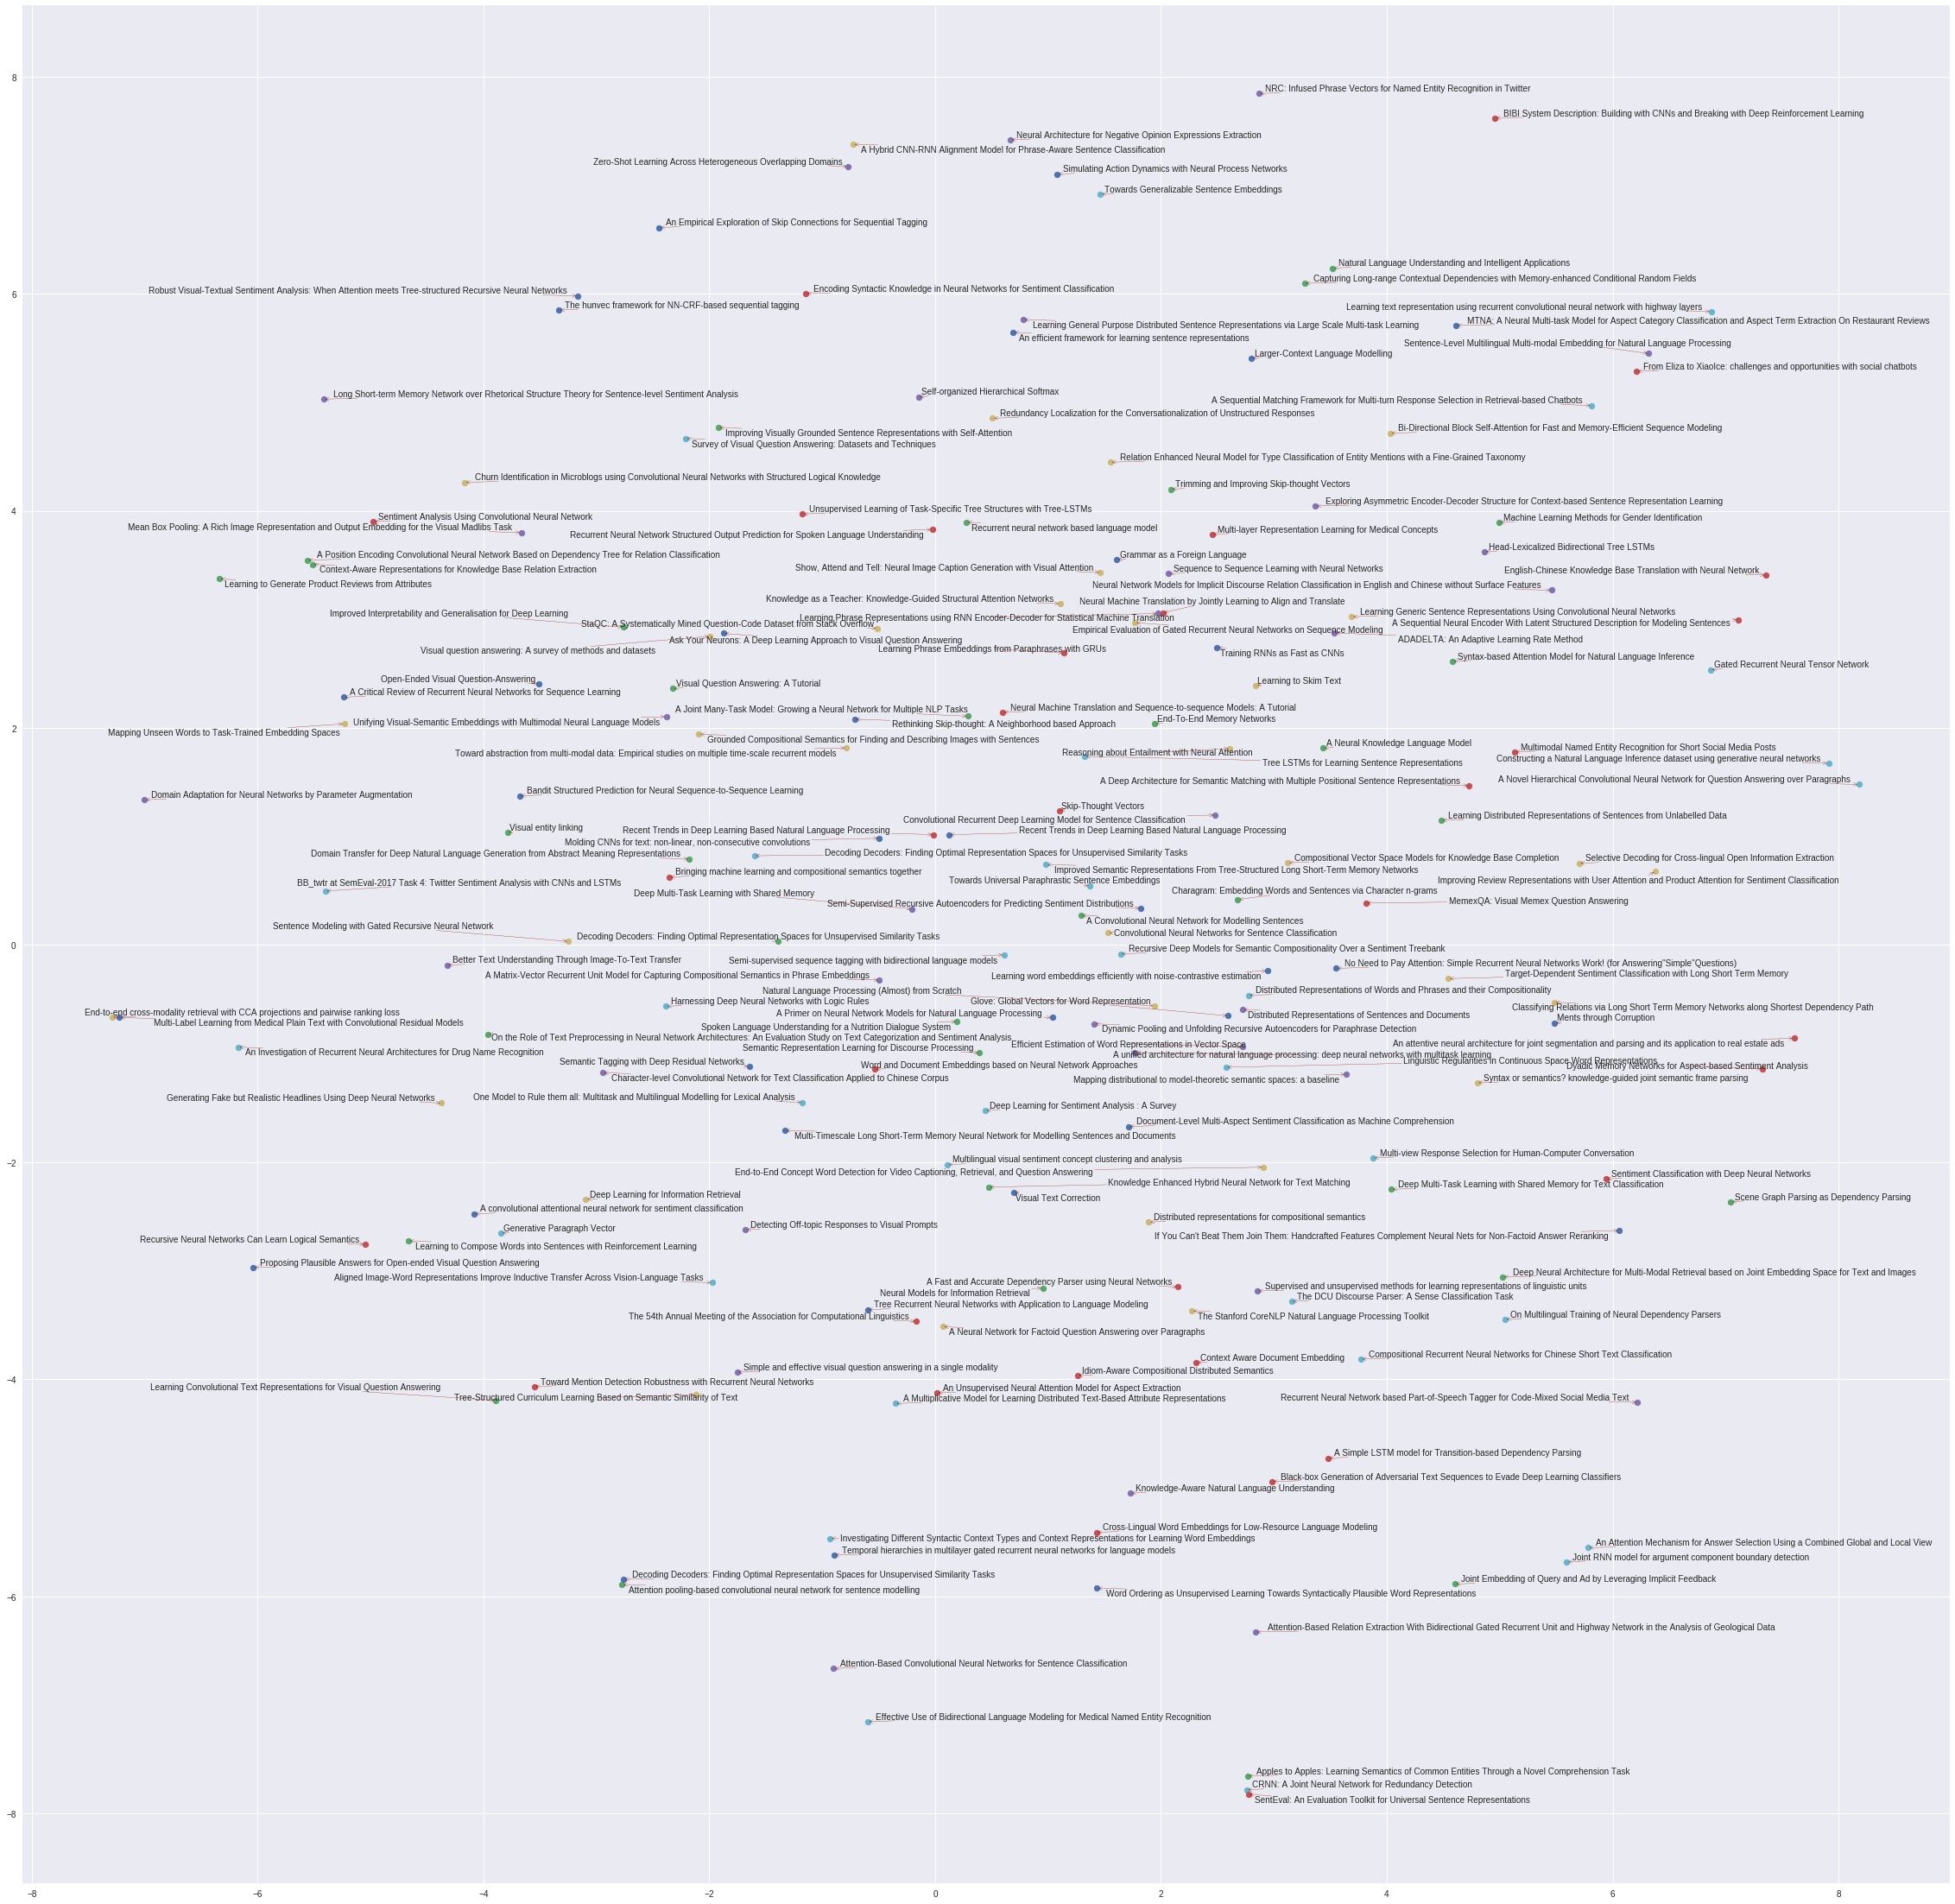

In [0]:
#Section 5

#Run this for a T-SNE map for the returned similar papers. Will take 15-18 minutes

stkINT = stkAll3[0][0:NumberOfPapers].astype(int)

for_TSNE = np.take(final_embeddings, stkINT, axis=0) 

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')
two_d_embeddings = tsne.fit_transform(for_TSNE)

texts = []

def plot(embeddings, labels):
  assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
  pyplot.figure(figsize=(40, 40))  # in inches

  for i, label in enumerate(labels):
    x, y = embeddings[i,:]
    pyplot.scatter(x, y)
    texts.append(pyplot.text(x, y, label))
  
  adjust_text(texts , arrowprops=dict(arrowstyle='->', color='#8f1402' ) ) 
  
  pyplot.show()


papers = [titleDict[i] for i in stkINT]
plot(two_d_embeddings, papers)
